# **Amazon Alexa Review Prediction**

https://www.kaggle.com/sid321axn/amazon-alexa-reviews

**Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

**Importing the dataset**

In [2]:
dataSet = pd.read_csv('/content/amazon_alexa.tsv', delimiter='\t')

dataSet

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


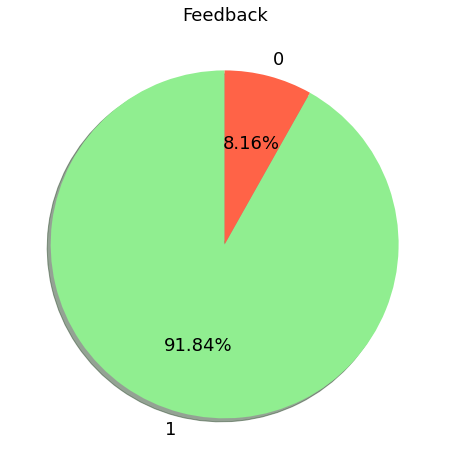

In [3]:
plt.figure(figsize=(12, 8))
font = {'weight': 'normal','size': 18}
plt.rc('font', **font)
plt.title('Feedback', size=18)
plt.pie(dataSet['feedback'].value_counts().values, 
        labels=dataSet['feedback'].value_counts().index, 
        colors=['lightgreen', 'tomato'], autopct='%1.2f%%', shadow=True, startangle=90)
plt.show()

In [4]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [5]:
dataSet.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


**Importing NLTK Library**

In [6]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
n =  dataSet.shape[0]
corpus = []
ps = PorterStemmer()

for i in range(n):
    text = re.sub('[^a-zA-Z]', ' ', dataSet['verified_reviews'][i].lower())
    text = text.split()  # Spliting text into words
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]  # Removing stopwords & # stemming
    text = ' '.join(text)  #Joining text
    corpus.append(text)

In [8]:
X = corpus
y = dataSet['feedback'].values

**Splitting the dataset into the Training set and Test set**

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Features Extraction**

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

In [11]:
X_train.shape

(2520, 5000)

**Training and Evaluating the Model**

In [12]:
def report(y_test, y_pred):
  from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
  import seaborn as sns

  cm = confusion_matrix(y_test, y_pred)
  print('Accuracy:', accuracy_score(y_test, y_pred), sep='\t')
  print('Precision:', precision_score(y_test, y_pred), sep='\t')
  print('Recall:', recall_score(y_test, y_pred), sep='\t\t')
  print('F1:', f1_score(y_test, y_pred), sep='\t\t')
  print('\n')

  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt = 'd', annot_kws={"size": 35}).set_title('Confusion Matrix')
  plt.show()

##Training The Model Using BernoulliNB

In [13]:
acc = {}

Accuracy:	0.9396825396825397
Precision:	0.9543918918918919
Recall:		0.9809027777777778
F1:		0.9674657534246575




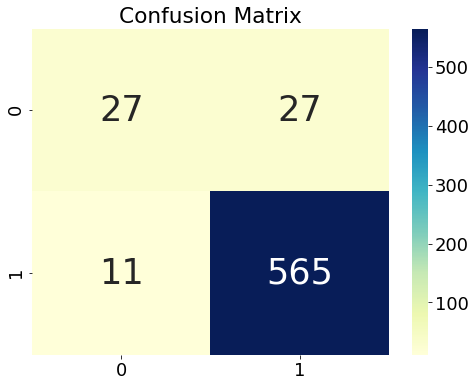

In [14]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB(alpha=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)
acc['BernoulliNB'] = accuracy_score(y_test, y_pred)

##Training The Model Using ComplementNB

Accuracy:	0.9063492063492063
Precision:	0.9640933572710951
Recall:		0.9322916666666666
F1:		0.9479258605472197




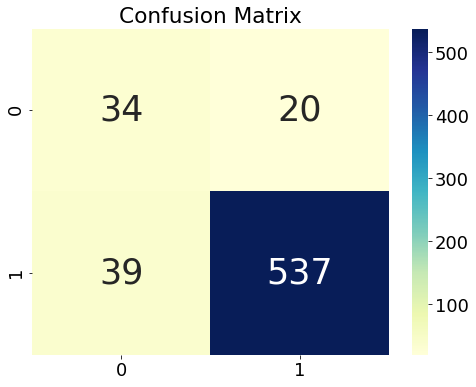

In [15]:
from sklearn.naive_bayes import ComplementNB

model = ComplementNB(alpha=0.3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)
acc['ComplementNB'] = accuracy_score(y_test, y_pred)

##Training The Model Using MultinomialNB

Accuracy:	0.9444444444444444
Precision:	0.9456342668863262
Recall:		0.9965277777777778
F1:		0.9704142011834319




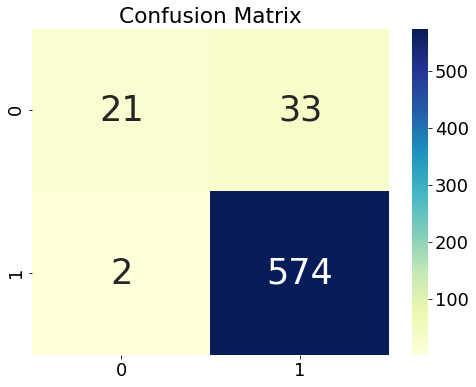

In [16]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB(alpha=0.001)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)
acc['MultinomialNB'] = accuracy_score(y_test, y_pred)

##Training The Model Using LinearSVC

Accuracy:	0.9507936507936507
Precision:	0.961082910321489
Recall:		0.9861111111111112
F1:		0.9734361610968294




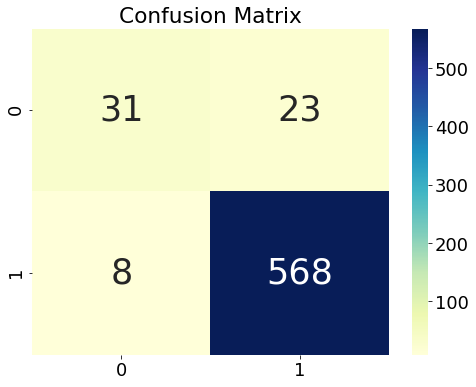

In [17]:
from sklearn.svm import LinearSVC

model = LinearSVC(C=5, random_state = 0)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)
acc['LinearSVC'] = accuracy_score(y_test, y_pred)

## Training The Model Using SGDClassifier

Accuracy:	0.9492063492063492
Precision:	0.9563758389261745
Recall:		0.9895833333333334
F1:		0.9726962457337884




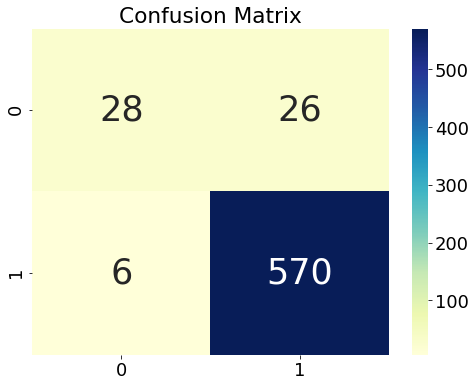

In [18]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier(random_state = 0)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)
acc['SGDClassifier'] = accuracy_score(y_test, y_pred)

**Summary**

In [19]:
pd.DataFrame(data = acc.values(),
             index = acc.keys(),
             columns = ['Accuracy']).sort_values(ascending = False, by = ['Accuracy'])

,Accuracy
LinearSVC,0.950794
SGDClassifier,0.949206
MultinomialNB,0.944444
BernoulliNB,0.939683
ComplementNB,0.906349
